In [1]:
from src.environment._ENV_capture import Board
from src.agent._AGENT_capture import Agent
from src.learn._q_learning_capture import Q_learning
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Capture chess
### Q-learning

In [4]:
board = Board()
agent = Agent(network='linear',gamma=0.1,lr=0.07)
R = Q_learning(agent,board)

100%|██████████| 200/200 [38:52<00:00, 11.66s/it]


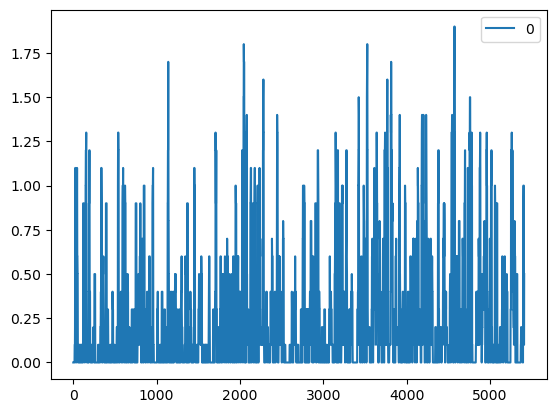

In [6]:
game = R.learn(200)

In [8]:
new_pgn = open("game.pgn", "w", encoding="utf-8")

<Axes: title={'center': 'average performance over the last 125 steps'}>

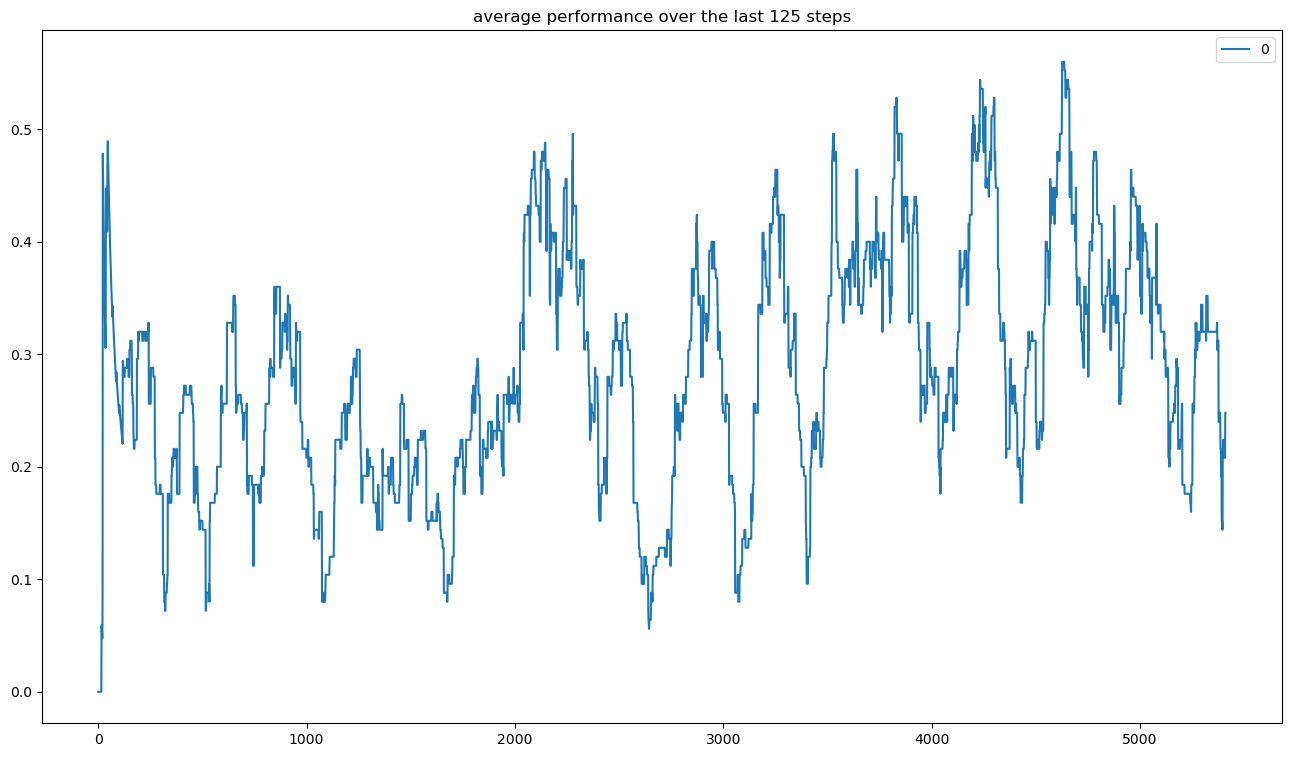

In [9]:
import pandas as pd
reward_smooth = pd.DataFrame(R.reward_trace)
reward_smooth.rolling(window=125,min_periods=0).mean().plot(figsize=(16,9),title='average performance over the last 125 steps')

In [10]:
print(game)

[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "*"]

1. e3 f6 2. Ba6 g6 3. Ke2 d6 4. Nc3 Bf5 5. Nd5 h6 6. Kf3 Qd7 7. Kf4 c6 8. Nf3 Qe6 9. b3 Rh7 10. a4 Qc8 11. Ra3 Rh8 12. g3 b5 13. Bxc8 bxa4 14. g4 Bxc8 15. Nxf6+ Kf7 16. c3 Rh7 17. Qc2 Kxf6 18. Qd3 Na6 19. c4 Rg7 20. Qb1 h5 21. d3 Rf7 22. Bd2 c5 23. Bc3+ Ke6+ 24. Kg3 Rf4 25. exf4 Rb8 26. Bb4 Rb6 *


In [12]:
board.reset()
bl = board.layer_board
bl[6,:,:] = 1/10  # Assume we are in move 10
av = R.agent.get_action_values(np.expand_dims(bl,axis=0))

av = av.reshape((64,64))

p = board.board.piece_at(20)#.symbol()


white_pieces = ['P','N','B','R','Q','K']
black_piece = ['_','p','n','b','r','q','k']

df = pd.DataFrame(np.zeros((6,7)))

df.index = white_pieces
df.columns = black_piece

for from_square in range(16):
    for to_square in range(30,64):
        from_piece = board.board.piece_at(from_square).symbol()
        to_piece = board.board.piece_at(to_square)
        if to_piece:
            to_piece = to_piece.symbol()
        else:
            to_piece = '_'
        df.loc[from_piece,to_piece] = av[from_square,to_square]


1/1 [==============================] - 0s 64ms/step


In [13]:
df[['_','p','n','b','r','q']]

,_,p,n,b,r,q
P,-0.002348,0.484666,-0.021295,-0.006625,0.218020,0.033772
N,0.032185,-0.075222,0.230777,0.015594,-0.201910,0.017710
B,0.113794,0.082008,-0.167052,0.065899,0.021492,-0.031449
R,-0.143343,-0.050325,-0.066637,0.079110,-0.105586,-0.013198
Q,-0.034639,-0.101624,-0.057797,-0.294715,0.004819,0.384550
K,-0.108359,0.150680,0.073964,0.019195,0.013264,0.017332


In [ ]:
game2 = R.learn(300)